# Sensing Positions

### Importing libraries

In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import glob
import os
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sb
import matplotlib.pyplot as plt

### Locating the files

In [2]:
cwd = os.getcwd()
rel_path = "Levels/"

path = os.path.join(cwd, rel_path)
noise = os.path.join(cwd, "Noise.csv")  # The noise values
print("1   ",noise)
all_files = glob.glob(path + "/*.csv") # Readings of the locations
print("2  ",all_files)

1    /Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Noise.csv
2   ['/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/C.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/F.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/G.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/E.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/D.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/Noise.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/I.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/H.csv']


### Processing data of noise

In [3]:

dfnoise = pd.read_csv(noise, index_col=None, header=0)
dfnoise['avgX']=dfnoise['X'].rolling(window=20,min_periods=1).mean()
dfnoise['avgY']=dfnoise['Y'].rolling(window=20,min_periods=1).mean()
# print(df)
print("max=",dfnoise['Y'].max())
print("min=",dfnoise['Y'].min())
print('mean=',dfnoise['Y'].mean())


max= 1556
min= -436
mean= 450.1187282662693


### Reading the files and processing the data

In [4]:
li = []
meanOverallX=[]
meanOverallY=[]
meanOverallLabel=[]
print("Overall Mean of each section:")
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0 )
    df = df[((df['Y'] <= dfnoise['Y'].min()) | (df['Y'] >= dfnoise['Y'].max())) | ((df['X'] <= dfnoise['X'].min()) | (df['X'] >= dfnoise['X'].max()) ) ] 
    print(filename)
#     print(df['X'].mean())
#     print(df.mean(axis = 0,skipna = True))

    meanOverallLabel.append( df['Label'].unique())
    meanOverallX.append( df['X'].mean())
    meanOverallY.append( df['Y'].mean())
    df['meanY']=df.mean(axis = 1,skipna = True)
    df['avgX']=df['X'].rolling(window=10,min_periods=1).mean()
    df['avgY']=df['Y'].rolling(window=10,min_periods=1).mean()
    df['minX']=df['X'].rolling(window=20,min_periods=1).min()
    df['minY']=df['Y'].rolling(window=20,min_periods=1).min()
    df.dropna()
    
    li.append(df)


frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.dropna()


Overall Mean of each section:
/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/C.csv
/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/F.csv
/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/G.csv
/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/E.csv
/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/D.csv
/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/Noise.csv
/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/I.csv
/Users/krishnamodi/Desktop/Lab/ads1115/Sensing2/Levels/H.csv


In [5]:
labels=[]
for x in range(len(meanOverallLabel)):
#     print(meanOverallLabel[x][0])
    labels.append(meanOverallLabel[x][0])


In [6]:
left = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 
  
# heights of bars 
height = meanOverallX
  
# labels for bars 
tick_label = labels


###  Mean of X and Y for different locations

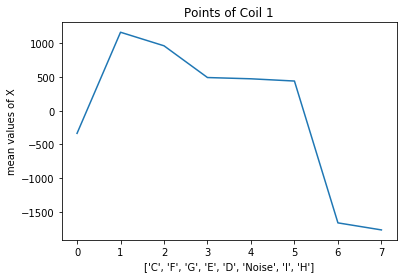

In [7]:
plt.plot(meanOverallX)
plt.xlabel(labels)
# naming the x-axis 
# naming the y-axis 
plt.ylabel('mean values of X') 
# plot title 
plt.title('Points of Coil 1') 
# plt.xticks(labels=labels)
plt.show()

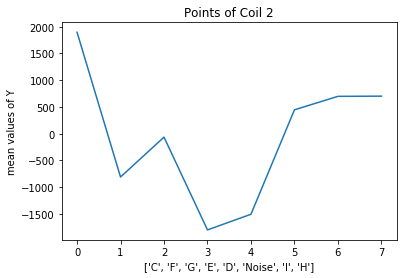

In [8]:
plt.plot(meanOverallY)
plt.xlabel(labels)
# plt.xticks(labels=labels)
plt.ylabel('mean values of Y') 
# plot title 
plt.title('Points of Coil 2') 
plt.show()

In [9]:
# df.drop([df.columns[1]] ,  axis='columns')
# df
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3044
Data columns (total 8 columns):
X        3045 non-null int64
Y        3045 non-null int64
Label    3045 non-null object
meanY    3045 non-null float64
avgX     3045 non-null float64
avgY     3045 non-null float64
minX     3045 non-null float64
minY     3045 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 214.1+ KB


In [10]:
# Loading scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

### Shuffling the data for better training

In [11]:
df2 = frame.sample(frac=1).reset_index(drop=True)
df2.head()

,X,Y,Label,meanY,avgX,avgY,minX,minY
0,502,-1951,E,-724.5,514.9,-1936.8,-177.0,-2627.0
1,-1057,13,H,-522.0,-1675.9,627.6,-2480.0,11.0
2,1620,-803,F,408.5,1260.3,-736.0,533.0,-1006.0
3,-433,1815,C,691.0,-360.9,1892.9,-474.0,1557.0
4,1131,-2283,D,-576.0,515.1,-1560.1,-297.0,-2283.0


### Separating input and output data

In [12]:
#assigning X and Y 
X = df2.drop(['Label'], axis = 1)
Y = df2['Label']

### Spliting the testing and training data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
#splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state =50)

#scaling the data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/anaconda2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


# Random Forest Classifier

In [15]:
clf=RandomForestClassifier(n_estimators=50,random_state=40)


In [16]:
#using traing set data to build the model
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [17]:
#predicting the data
y_pred=clf.predict(X_test)

#### Accuracy Score

In [18]:
rfacc = accuracy_score(y_test,y_pred)
rfacc

0.9671916010498688

# SVM Classifier

In [19]:
from sklearn import svm

In [20]:
clf_svm = svm.SVC(gamma='scale')

In [21]:
 clf_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred_svm=clf_svm.predict(X_test)

#### Accuracy Score

In [23]:
svmacc = accuracy_score(y_test,y_pred_svm)
svmacc

0.8490813648293963

# Linear SVM

In [24]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [25]:
y_pred_lin_clf=lin_clf.predict(X_test)

#### Accuracy Score

In [26]:
linsvmacc = accuracy_score(y_test,y_pred_lin_clf)
linsvmacc

0.7677165354330708

# Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix 

In [28]:
results = confusion_matrix(y_test,y_pred) 

In [29]:
print(results)

[[ 40   0   0   0   0   0   0   0]
 [  0 133   2   0   0   0   0   0]
 [  0   5 192   0   0   0   0   0]
 [  0   0   0  57   0   0   0   0]
 [  0   0   0   0  31   0   0   0]
 [  0   0   0   0   0 201   5   0]
 [  0   0   1   0   1  10  83   0]
 [  0   0   1   0   0   0   0   0]]


In [30]:
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn import metrics
def plot_cm(X, y, clf, title, dest):

    cm = metrics.confusion_matrix(y, clf.predict(X))

    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(8, 4))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=labels,
            xticklabels=labels,
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.savefig(dest, dpi=1000)
    plt.show()

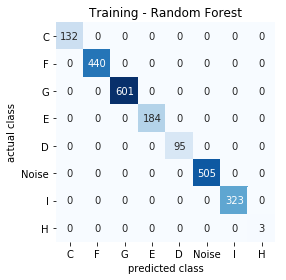

In [31]:

plot_cm(X_train, y_train, clf, 'Training - Random Forest', '../confmat_randomforesttrain.png')


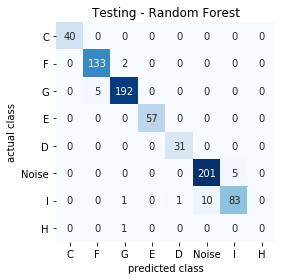

In [32]:

plot_cm(X_test, y_test, clf, 'Testing - Random Forest', '../confmat_randomforesttest.png')


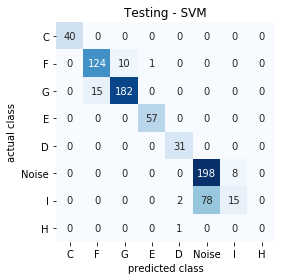

In [33]:

plot_cm(X_test, y_test, clf_svm, 'Testing - SVM', '../confmat_svmtest.png')


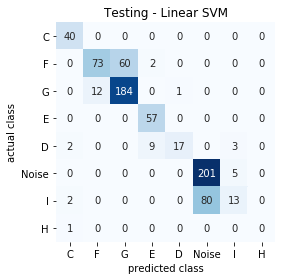

In [34]:

plot_cm(X_test, y_test, lin_clf, 'Testing - Linear SVM', '../confmat_linearsvmtest.png')


## Accuracy

In [35]:
print("Random Forest: \t", rfacc*100,"%" )
print("SVM:\t\t", svmacc*100,"%" )
print("Linear SVM:\t",linsvmacc*100,"%" )

Random Forest: 	 96.71916010498688 %
SVM:		 84.90813648293964 %
Linear SVM:	 76.77165354330708 %
